<a href="https://colab.research.google.com/github/GiladitasdL/Desafio-Telecom-X-Parte-1/blob/main/TelecomX_LATAM_Eleonora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

 Importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

In [112]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
#Elegi colores personalizados para empezar
churn_colors = {True: "#E74C3C", False: "#2ECC71"}  # rojo = churn-abandona, verde = no churn- no abandona


#Para usar la API externa, uso la URL raw del repo de Ingrid.
url_desde_api = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url_desde_api)
data = response.json()


# Funciones utiles

In [101]:
def resumen_churn(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Resumen de una columna categórica vs distribución porcentual de abandono (Churn).
    Devuelve tabla con porcentajes de abandono.
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame que contiene la columna 'Churn' y la columna categórica de interés.
    col : str
        Nombre de la columna categórica a analizar frente a Churn.
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    tabla : pd.DataFrame
        DataFrame con los porcentajes de clientes que abandonan o permanecen,
        desglosado por categorías de la columna seleccionada.
    """
    tabla = (
        df.groupby(col)["Churn"]
        .value_counts(normalize=True)
        .mul(100)
        .rename("porcentaje")
        .reset_index()
    )
    return tabla


In [111]:
def grafico_barra_churn(df: pd.DataFrame, col: str, titulo: str = None):
    """
    Grafica barras apiladas mostrando distribución de Churn por categoría.
    """
    tabla = (
        df.groupby(col)["Churn"]
        .value_counts(normalize=True)
        .mul(100)
        .rename("porcentaje")
        .reset_index()
    )
    tabla = tabla.pivot(index=col, columns="Churn", values="porcentaje").fillna(0)

    # Ordenar categorías según abandono (True)
    tabla = tabla.sort_values(by=True, ascending=False)

    tabla.plot(
        kind="barh",
        stacked=True,
        color=[churn_colors[False], churn_colors[True]],
        figsize=(8, 5),
        edgecolor="black"
    )
    plt.xlabel("Porcentaje (%)")
    plt.ylabel(col)
    plt.title(titulo if titulo else f"Churn según {col}", fontsize=14, pad=15)
    plt.legend(title="Churn", labels=["No abandona", "Abandona"])
    plt.show()


In [104]:
def grafico_boxplot(df: pd.DataFrame, col: str, titulo: str = None):
    """
    Boxplot de una variable numérica vs Churn.
    """
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=df, x="Churn", y=col, hue="Churn", palette=churn_colors)
    plt.title(titulo if titulo else f"Distribución de {col} según Churn", fontsize=14, pad=15)
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.legend([],[], frameon=False)  # quita leyenda duplicada
    plt.show()

#🔧 Transformación

In [49]:

df_usuarios = pd.json_normalize(data, sep='.')

#['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', ...]
print(df_usuarios.columns.tolist())

col_enteros = [ 'customer.tenure']
col_decimal = ['account.Charges.Monthly', 'account.Charges.Total']

#Reemplazar los espacios vacios de columnas numéricas
df_usuarios[col_decimal] = df_usuarios[col_decimal].replace(' ', np.nan)
#Tipos correctos de datos
df_usuarios[col_enteros] = df_usuarios[col_enteros].astype(np.int64)
df_usuarios[col_decimal] = df_usuarios[col_decimal].astype(np.float64)

#df completo
df_usuarios.head()


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [12]:
df_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [14]:
df_usuarios.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [57]:
# Convertir a string
df_usuarios['customer.gender'] = df_usuarios['customer.gender'].astype("string")
df_usuarios['account.PaymentMethod'] = df_usuarios['account.PaymentMethod'].astype("string")
df_usuarios['internet.InternetService'] = df_usuarios['internet.InternetService'].astype("string")
df_usuarios['account.Contract'] = df_usuarios['account.Contract'].astype("string")

# Limpiar espacios al inicio/final y pasar todo a minúscula
df_usuarios['customer.gender'] = df_usuarios['customer.gender'].str.strip().str.lower()
df_usuarios['account.PaymentMethod'] = df_usuarios['account.PaymentMethod'].str.strip().str.lower()
df_usuarios['internet.InternetService'] = df_usuarios['internet.InternetService'].str.strip().str.lower()
df_usuarios['account.Contract'] = df_usuarios['account.Contract'].str.lower()

#Eliminar los guiones de tipo de contrato
df_usuarios['account.Contract'] = df_usuarios['account.Contract'].str.replace('-', '', regex=True)

#convertir en valores binarios
col_bool = ['customer.SeniorCitizen', 'Churn', 'customer.Dependents', 'phone.PhoneService','phone.MultipleLines','internet.OnlineSecurity', 'internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies']
df_usuarios[col_bool] = df_usuarios[col_bool].astype("bool")


In [45]:
df_usuarios['internet.InternetService'].unique()

<StringArray>
['dsl', 'fiber optic', 'no']
Length: 3, dtype: string

In [46]:
df_usuarios['account.PaymentMethod'].unique()

<StringArray>
[             'mailed check',          'electronic check',
   'credit card (automatic)', 'bank transfer (automatic)']
Length: 4, dtype: string

In [58]:
df_usuarios.dtypes


,0
customerID,object
Churn,bool
customer.gender,string[python]
customer.SeniorCitizen,bool
customer.Partner,object
customer.Dependents,bool
customer.tenure,int64
phone.PhoneService,bool
phone.MultipleLines,bool
internet.InternetService,string[python]


In [59]:
#columna Cuentas_Diarias suponiendo meses de 30 dias
df_usuarios['Cuentas_Diarias'] = df_usuarios['account.Charges.Monthly'] / 30
#Visualizar las dos columnas mensual y valor diario
df_usuarios[['account.Charges.Monthly', 'Cuentas_Diarias']].head()


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga y análisis

 **1. Distribución de evasión**

In [61]:
# Descriptiva de columnas numericas
df_usuarios.describe(percentiles=[.25, .5, .75])

,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157337
std,24.571773,30.129572,2268.632997,1.004319
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.425000,400.225000,1.180833
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.875000,3785.300000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [60]:
# Clientes segun si abandonaron o no, por churn
df_usuarios.groupby('Churn')[['customer.SeniorCitizen', 'customer.tenure',
                              'account.Charges.Monthly', 'account.Charges.Total',
                              'Cuentas_Diarias']].describe()

customer.tenure                                                    \
                count       mean        std  min  25%   50%   75%   max   
Churn                                                                     
False           224.0  31.571429  24.998552  1.0  7.0  29.0  56.0  72.0   
True           7043.0  32.371149  24.559481  0.0  9.0  29.0  55.0  72.0   

      account.Charges.Monthly             ... account.Charges.Total          \
                        count       mean  ...                   75%     max   
Churn                                     ...                                 
False                   224.0  63.412277  ...             3562.8625  8425.3   
True                   7043.0  64.761692  ...             3794.7375  8684.8   

      Cuentas_Diarias                                                    \
                count      mean       std       min       25%       50%   
Churn                                                                     
False           224.0  2.113743  1.046290  0.625000  0.947500  2.303333   
True           7043.0  2.158723  1.003002  0.608333  1.183333  2.345000   

                          
           75%       max  
Churn                     
False  3.01375  3.851667  
True   2.99500  3.958333  

[2 rows x 32 columns]

**2. Recuento de evasión por variables categóricas**

In [84]:
#Que perfiles tienen tendencia a abandonar
#porcentaje de clientes que se fueron y que se quedaron por categoria en la var categorias.
#documentacion: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.value_counts.html

categoricas = ['customer.gender', 'phone.PhoneService', 'phone.MultipleLines',
               'internet.InternetService', 'internet.OnlineSecurity',
               'internet.OnlineBackup', 'internet.DeviceProtection',
               'internet.StreamingTV', 'internet.StreamingMovies',
               'account.Contract', 'account.PaymentMethod']

#Los valores son el porcentaje de clientes que se quedaron (False) y que se fueron (True) dentro de esa categoría.
for col in categoricas:
    print(f"\n--- {col} ---")
    porcentaje = df_usuarios.groupby(col)['Churn'].value_counts(normalize=True).mul(100).round(2)
    print(porcentaje.unstack())
    print(porcentaje.round(2))


--- customer.gender ---
Churn            False  True 
customer.gender              
female            2.90  97.10
male              3.27  96.73
customer.gender  Churn
female           True     97.10
                 False     2.90
male             True     96.73
                 False     3.27
Name: proportion, dtype: float64

--- phone.PhoneService ---
Churn               False  True 
phone.PhoneService              
True                 3.08  96.92
phone.PhoneService  Churn
True                True     96.92
                    False     3.08
Name: proportion, dtype: float64

--- phone.MultipleLines ---
Churn                False  True 
phone.MultipleLines              
True                  3.08  96.92
phone.MultipleLines  Churn
True                 True     96.92
                     False     3.08
Name: proportion, dtype: float64

--- internet.InternetService ---
Churn                     False  True 
internet.InternetService              
dsl                        2.69  97.31
f

In [85]:
# Tamaño, tipos de columnas, valores nulos
df_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   bool   
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   bool   
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   bool   
 8   phone.MultipleLines        7267 non-null   bool   
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    7267 non-null   bool   
 11  internet.OnlineBackup      7267 non-null   bool   
 12  internet.DeviceProtection  7267 non-null   bool   
 13  internet.TechSupport       7267 non-null   bool 

In [88]:
df_usuarios.describe().round(3)


,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7267.000,7267.000,7256.000,7267.000
mean,32.346,64.720,2280.634,2.157
std,24.572,30.130,2268.633,1.004
min,0.000,18.250,18.800,0.608
25%,9.000,35.425,400.225,1.181
50%,29.000,70.300,1391.000,2.343
75%,55.000,89.875,3785.300,2.996
max,72.000,118.750,8684.800,3.958


In [96]:
df_usuarios['Churn'].value_counts(normalize=True)  # porcentaje de clientes que se fueron vs se quedaron


,proportion
Churn,
True,0.969176
False,0.030824


In [91]:
# Para ver todas las categorías únicas
categoricas = df_usuarios.select_dtypes(include='string').columns.tolist()
for col in categoricas:
    print(f"\n--- {col} ---")
    print(f"{col}: {df_usuarios[col].unique()}")


--- customer.gender ---
customer.gender: <StringArray>
['female', 'male']
Length: 2, dtype: string

--- internet.InternetService ---
internet.InternetService: <StringArray>
['dsl', 'fiber optic', 'no']
Length: 3, dtype: string

--- account.Contract ---
account.Contract: <StringArray>
['one year', 'monthtomonth', 'two year']
Length: 3, dtype: string

--- account.PaymentMethod ---
account.PaymentMethod: <StringArray>
[             'mailed check',          'electronic check',
   'credit card (automatic)', 'bank transfer (automatic)']
Length: 4, dtype: string


In [94]:
num_cols = ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']

#Numéricas: comparar media y mediana según si el cliente se fue o no
for col in num_cols:
    print(f"\n--- {col} ---")
    print(df_usuarios.groupby('Churn')[col].mean())



--- customer.SeniorCitizen ---
Churn
False    0.178571
True     0.162147
Name: customer.SeniorCitizen, dtype: float64

--- customer.tenure ---
Churn
False    31.571429
True     32.371149
Name: customer.tenure, dtype: float64

--- account.Charges.Monthly ---
Churn
False    63.412277
True     64.761692
Name: account.Charges.Monthly, dtype: float64

--- account.Charges.Total ---
Churn
False    2196.933705
True     2283.300441
Name: account.Charges.Total, dtype: float64

--- Cuentas_Diarias ---
Churn
False    2.113743
True     2.158723
Name: Cuentas_Diarias, dtype: float64


In [98]:
#Categóricas: porcentaje de Churn por categoría
cat_cols = ['phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
            'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
            'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
            'account.PaymentMethod']

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df_usuarios.groupby(col)['Churn'].value_counts(normalize=True).unstack())


--- phone.PhoneService ---
Churn                  False     True 
phone.PhoneService                    
True                0.030824  0.969176

--- phone.MultipleLines ---
Churn                   False     True 
phone.MultipleLines                    
True                 0.030824  0.969176

--- internet.InternetService ---
Churn                        False     True 
internet.InternetService                    
dsl                       0.026929  0.973071
fiber optic               0.031895  0.968105
no                        0.034788  0.965212

--- internet.OnlineSecurity ---
Churn                       False     True 
internet.OnlineSecurity                    
True                     0.030824  0.969176

--- internet.OnlineBackup ---
Churn                     False     True 
internet.OnlineBackup                    
True                   0.030824  0.969176

--- internet.DeviceProtection ---
Churn                         False     True 
internet.DeviceProtection                   

# Antigüedad del cliente vs. abandono
* ¿Los clientes con más tiempo en la empresa tienen menor tendencia a abandonar?

# Gasto mensual vs abandono
* ¿Existe relación entre cuánto gasta el cliente al mes y su probabilidad de dejar la empresa?

 Aclaracion: se omite el gasto total a lo largo del ciclo de vida, porque el gasto mensual ya da una buena señal

# Servicios
   * Tipo de servicio contratado vs abandono

   ¿Los clientes con Internet DSL o fibra presentan distinta tendencia a abandonar?
   *Tipo de contrato vs. abandono

   ¿Cuál tipo de contrato (mes a mes, 1 año, 2 años) y sí se asocia más con la cancelación del servicio?

   Aclaracion: Se omite PhoneService y métodos de pago, ya que muchas categorías están uniformes y aportan poco al análisis.
   
#  Perfil del cliente
  * Edad y género vs abandono

  ¿Ser ciudadano mayor o el género influye en la probabilidad de abandono?
  
  Aclaracion: Se omite la situación familiar, en análisis exploratorio suele aportar poco comparado con antigüedad y gasto.

#Resumiendo
# Las funciones :
* resumen_churn
* grafico_barra_churn
* grafico_boxplot

# Las preguntas de análisis :

* Distribución global de Churn

* Recuento de Churn por categóricas

* Recuento de Churn por numéricas

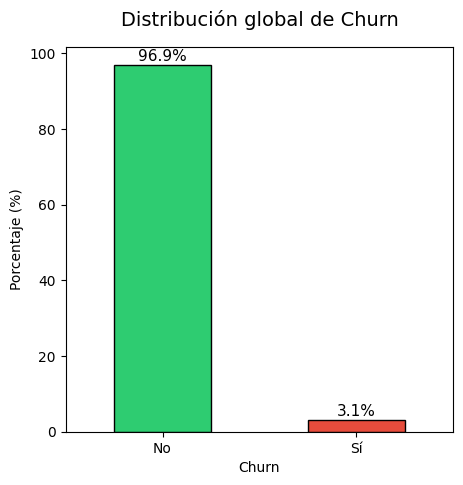

,customer.gender,Churn,porcentaje
0,female,True,97.104677
1,female,False,2.895323
2,male,True,96.734694
3,male,False,3.265306


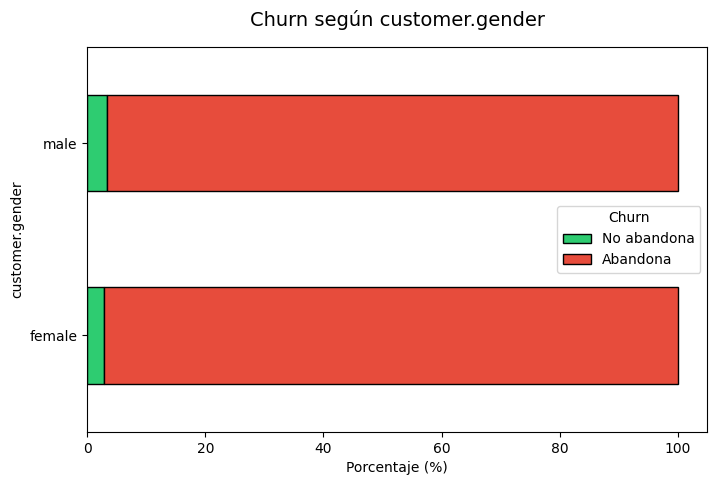

,customer.SeniorCitizen,Churn,porcentaje
0,False,True,96.976171
1,False,False,3.023829
2,True,True,96.615905
3,True,False,3.384095


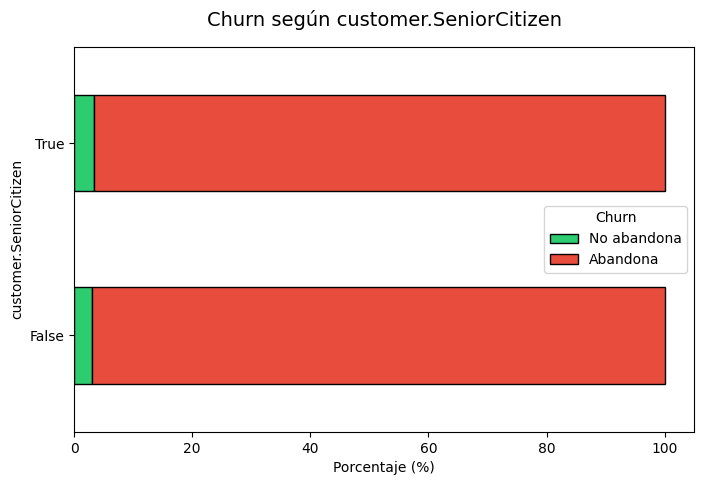

,internet.InternetService,Churn,porcentaje
0,dsl,True,97.307074
1,dsl,False,2.692926
2,fiber optic,True,96.810507
3,fiber optic,False,3.189493
4,no,True,96.521189
5,no,False,3.478811


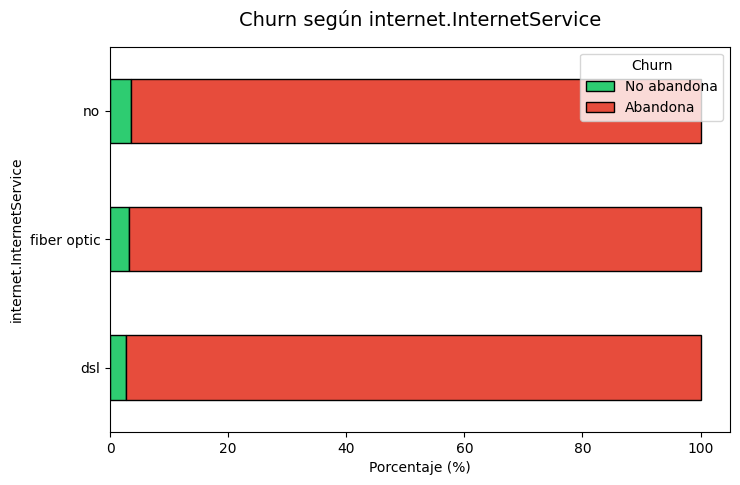

,account.Contract,Churn,porcentaje
0,monthtomonth,True,96.754057
1,monthtomonth,False,3.245943
2,one year,True,96.971692
3,one year,False,3.028308
4,two year,True,97.246127
5,two year,False,2.753873


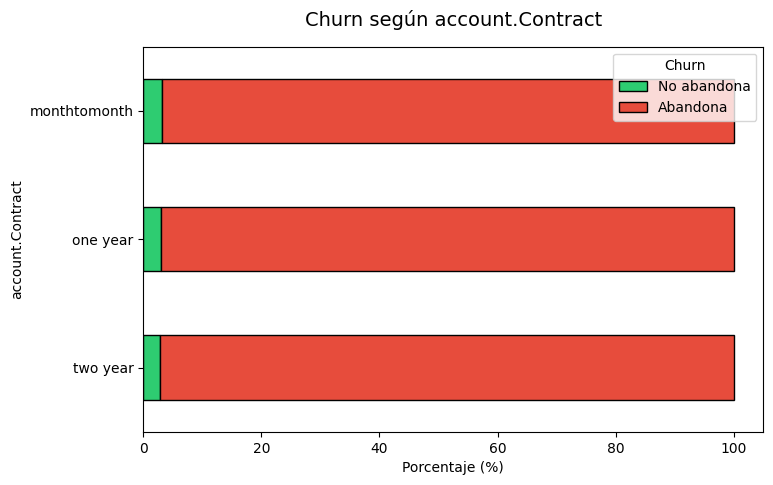

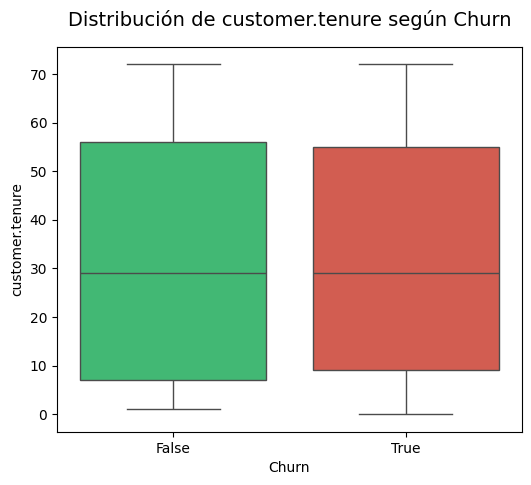

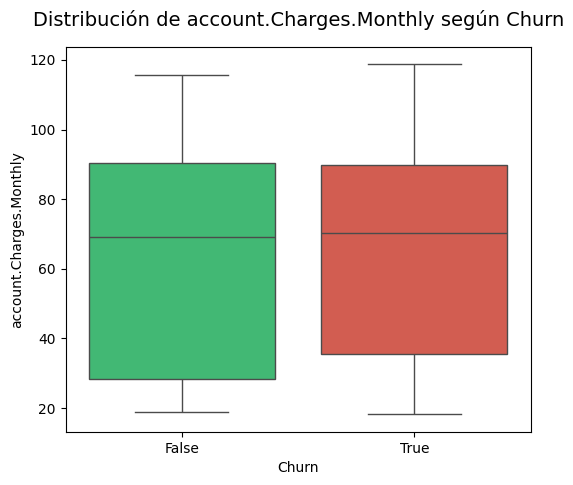

In [113]:

# 1. Distribución global de Churn
fig, ax = plt.subplots(figsize=(5, 5))
df_usuarios["Churn"].value_counts(normalize=True).mul(100).plot(
    kind="bar",
    color=[churn_colors[False], churn_colors[True]],
    edgecolor="black",
    ax=ax
)
ax.set_title("Distribución global de Churn", fontsize=14, pad=15)
ax.set_ylabel("Porcentaje (%)")
ax.set_xticklabels(["No", "Sí"], rotation=0)
for i, v in enumerate(df_usuarios["Churn"].value_counts(normalize=True).mul(100)):
    ax.text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=11)

plt.show()


# 2. Recuento de evasión por variables categóricas son 4 gráficos de barras
categoricas = [
    "customer.gender",
    "customer.SeniorCitizen",
    "internet.InternetService",
    "account.Contract"
]

for col in categoricas:
    display(resumen_churn(df_usuarios, col))   # tabla resumen
    grafico_barra_churn(df_usuarios, col)      # gráfico de barras


# 3. Recuento de evasión por variables numéricas - 2 boxplots.
numericas = [
    "customer.tenure",
    "account.Charges.Monthly"
]

for col in numericas:
    grafico_boxplot(df_usuarios, col)


#📄Informe final

# Distribución global de Churn
* 96.9% de clientes no abandonaron.
* 3.1% sí abandonaron.
Esto da el punto de partida para todo: el churn es bajo, pero existe y se busca entender a quiénes y como afecta.


# Antigüedad vs abandono (customer.tenure → con boxplot)
Mediana:

La mediana de "customer.tenure" es más alta para los clientes que no abandonan (Churn = False) en comparación con los clientes que sí abandonan (Churn = True). Esto sugiere que los clientes con mayor antigüedad tienden a permanecer.


Rango Intercuartílico (IQR):

El IQR (la caja) para los clientes que no abandonan es más amplio que para los que sí abandonan, lo que indica una mayor variabilidad en la antigüedad de los clientes que permanecen.

Distribución:

La distribución de la antigüedad para los clientes que no abandonan parece estar sesgada hacia valores más altos, mientras que para los clientes que sí abandonan, la antigüedad tiende a ser menor.

En ambos casos, los bigotes cubren un rango similar, aunque el rango general de "customer.tenure" es mayor para los que no abandonan.


# Gasto mensual vs abandono (account.Charges.Monthly → con boxplot)

Mediana:

La mediana de los cargos mensuales es más alta para los clientes que han abandonado el servicio (Churn: True) en comparación con aquellos que no lo han hecho (Churn: False). Esto se observa por la línea central dentro de cada caja.

Rango Intercuartílico (RIC):

La dispersión de los cargos mensuales, representada por el tamaño de la caja (RIC), es similar para ambos grupos. La caja verde (Churn: False) abarca un rango de aproximadamente 30 a 90, mientras que la caja roja (Churn: True) abarca un rango similar, aunque ligeramente desplazado hacia arriba.

Distinución:
Los bigotes en ambos grupos se extienden a rangos de valores similares, indicando que las distribuciones de los datos, excluyendo posibles valores atípicos, tienen una extensión comparable.

Los clientes que abandonan el servicio (Churn: True) tienden a tener cargos mensuales más altos en promedio en comparación con aquellos que permanecen (Churn: False), aunque la variabilidad en los cargos mensuales es similar en ambos grupos.

# Tipo de servicio contratado vs abandono (internet.InternetService)
DSL:

* Abandona (True): El 97.31% de los clientes con servicio DSL abandonan el servicio.
* No abandona (False): El 2.69% de los clientes con servicio DSL no abandonan el servicio.

Fibra óptica (Fiber Optic):

*Abandona (True): El 96.81% de los clientes con servicio de fibra óptica abandonan el servicio.
* No abandona (False): El 3.19% de los clientes con servicio de fibra óptica no abandonan el servicio.

Sin servicio de internet (No):

* Abandona (True): El 96.52% de los clientes sin servicio de internet abandonan el servicio.
* No abandona (False): El 3.48% de los clientes sin servicio de internet no abandonan el servicio.


La gráfica y los datos indican que la gran mayoría de los clientes, independientemente del tipo de servicio de internet, o la ausencia de este, tienden a abandonar el servicio.
El porcentaje de abandono es consistentemente alto en todas las categorías, superando el 96% en cada una.
El menor porcentaje de abandono se observa en los clientes sin servicio de internet ("no"), mientras que el mayor se da en los clientes con DSL.

# Tipo de contrato vs abandono (account.Contract)
Contratos mes a mes (monthtomonth):
* Abandono (True): El 96.75% de los clientes con contratos mes a mes abandonan.
* No abandono (False): Solo el 3.25% de los clientes con contratos mes a mes no abandonan.

Este tipo de contrato muestra la tasa de abandono más alta entre los tres, lo que indica una baja retención de clientes para los contratos de corta duración.

Contratos de un año (one year):

* Abandono (True): El 96.97% de los clientes con contratos de un año abandonan.
* No abandono (False): El 3.03% de los clientes con contratos de un año no abandonan.


Contratos de dos años (two year):

* Abandono (True): El 97.25% de los clientes con contratos de dos años abandonan.
* No abandono (False): El 2.75% de los clientes con contratos de dos años no abandonan.

 Esto podría indicar problemas subyacentes que afectan la satisfacción del cliente a largo plazo.

En todos los tipos de contrato analizados, la proporción de clientes que abandonan es alta (más del 96% en cada caso), mientras que la proporción de clientes que no abandonan es muy baja. Los contratos de mayor duración muestran la tasa de abandono más alta, lo que es un hallazgo significativo para la estrategia de retención de clientes.

# Edad y género vs abandono
La proporción de clientes que "Abandona" es significativamente mayor que la de clientes que "No abandona", independientemente de si son o no ciudadanos senior.

A simple vista, el porcentaje de abandono parece ser muy similar tanto en clientes masculinos como femeninos, lo que sugiere que el género, al igual que si son o no ciudadanos senoir, no es un factor determinante en la propensión al abandono en este conjunto de datos.

#COnclusion general
El abandono está más relacionado con factores de contrato, servicio y gasto mensual, que con características demográficas del cliente.
En particular:
* Clientes nuevos.
* Contratos mes a mes.
* Y con cargos mensuales más altos.
Estos resultados permiten orientar acciones de retención hacia ofertas de fidelización en los primeros meses, mejoras en la experiencia del servicio de Fibra Óptica y estrategias de precios o beneficios que reduzcan la percepción de costo elevado, por ejemplo.